In [3]:
import numpy as np
import pdb
from PIL import Image
from scipy import ndimage
import os
import unittest
from scipy.ndimage import maximum_filter

In [4]:
png_file = Image.open("C:\\Data\\2.png")
array_image = np.array(png_file)
kernel_3d = np.random.rand(3, 3, 4)
png_file_1 = Image.open("C:\\Data\\1.png")
array_image_1 = np.array(png_file_1)

In [5]:
test_image = np.random.rand(10, 10, 4)

In [6]:
test_image

array([[[1.77310926e-01, 1.13357538e-01, 5.50872890e-01, 9.36555143e-01],
        [1.60361973e-01, 5.76944884e-01, 4.89572480e-01, 2.14125089e-01],
        [4.40913666e-01, 2.09620944e-01, 1.39039313e-01, 5.21982841e-01],
        [6.08242860e-01, 1.07074929e-01, 5.87409381e-01, 2.70262937e-01],
        [4.38542160e-02, 5.88007460e-01, 7.69561299e-01, 7.78361928e-01],
        [6.68719160e-01, 5.62118756e-02, 7.87022205e-01, 4.98327115e-01],
        [8.44128075e-01, 2.64955303e-01, 3.92166541e-01, 3.12833401e-01],
        [4.19337898e-01, 9.37690344e-01, 5.46302572e-01, 4.99581963e-01],
        [1.19603432e-01, 9.84742455e-02, 6.55900845e-02, 6.38890313e-01],
        [8.44825390e-01, 6.07090762e-01, 8.38164568e-01, 3.61605129e-01]],

       [[8.77841506e-01, 3.64536812e-01, 8.93529625e-01, 5.65887283e-01],
        [8.21194116e-01, 4.06020988e-01, 5.81944698e-01, 8.41378212e-01],
        [4.36786045e-01, 9.65137736e-01, 2.36762932e-01, 2.92903379e-01],
        [6.32332390e-01, 8.04525346e

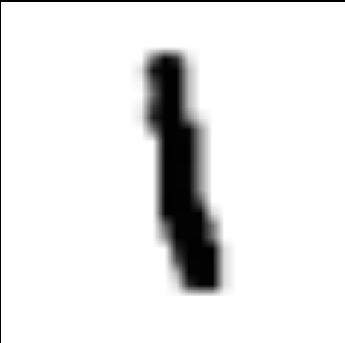

In [7]:
png_file_1

In [8]:
def convolve_one_step(input_image):
    intermediate_values = []
    dimensions = input_image.shape
    final_values = []
    for i in range(dimensions[0] - 2):
        for j in range(dimensions[1] - 2):
            for k in range(dimensions[2]):
                slice_of_image = input_image[i : i + 3, j : j + 3, k]
                real_kernel = kernel_3d[:, :, k]
                #pdb.set_trace()
                value = np.vdot(slice_of_image, real_kernel)
                intermediate_values.append(value)
                #pdb.set_trace()
                if len(intermediate_values) == 4:
                    final_values.append(sum_dimension(intermediate_values))
                    intermediate_values.clear()
    return np.array(final_values)

In [9]:
def sum_dimension(list_of_three):
    return sum(list_of_three)

In [10]:
image_after_conv_2 = np.array(convolve_one_step(array_image)).reshape(588, 584, 1)

In [11]:
image_after_conv_1 = np.array(convolve_one_step(array_image_1)).reshape(341, 343, 1)

In [12]:
image_after_conv_1

array([[[2018.15040791],
        [2364.85457503],
        [2364.85457503],
        ...,
        [2364.85457503],
        [2364.85457503],
        [2364.85457503]],

       [[2644.71528259],
        [3425.06318566],
        [3425.06318566],
        ...,
        [3425.06318566],
        [3425.06318566],
        [3425.06318566]],

       [[3591.25606583],
        [4799.31292342],
        [4799.31292342],
        ...,
        [4799.31292342],
        [4799.31292342],
        [4799.31292342]],

       ...,

       [[3591.25606583],
        [4799.31292342],
        [4799.31292342],
        ...,
        [4799.31292342],
        [4799.31292342],
        [4799.31292342]],

       [[3591.25606583],
        [4799.31292342],
        [4799.31292342],
        ...,
        [4799.31292342],
        [4799.31292342],
        [4799.31292342]],

       [[3591.25606583],
        [4799.31292342],
        [4799.31292342],
        ...,
        [4799.31292342],
        [4799.31292342],
        [4799.31292342]]

In [13]:
def format_an_image(image_array):
    image_array = image_array.astype(np.uint8)
    image_array = np.squeeze(image_array)
    image_array = Image.fromarray(image_array)
    return image_array

In [14]:
test_image

array([[[1.77310926e-01, 1.13357538e-01, 5.50872890e-01, 9.36555143e-01],
        [1.60361973e-01, 5.76944884e-01, 4.89572480e-01, 2.14125089e-01],
        [4.40913666e-01, 2.09620944e-01, 1.39039313e-01, 5.21982841e-01],
        [6.08242860e-01, 1.07074929e-01, 5.87409381e-01, 2.70262937e-01],
        [4.38542160e-02, 5.88007460e-01, 7.69561299e-01, 7.78361928e-01],
        [6.68719160e-01, 5.62118756e-02, 7.87022205e-01, 4.98327115e-01],
        [8.44128075e-01, 2.64955303e-01, 3.92166541e-01, 3.12833401e-01],
        [4.19337898e-01, 9.37690344e-01, 5.46302572e-01, 4.99581963e-01],
        [1.19603432e-01, 9.84742455e-02, 6.55900845e-02, 6.38890313e-01],
        [8.44825390e-01, 6.07090762e-01, 8.38164568e-01, 3.61605129e-01]],

       [[8.77841506e-01, 3.64536812e-01, 8.93529625e-01, 5.65887283e-01],
        [8.21194116e-01, 4.06020988e-01, 5.81944698e-01, 8.41378212e-01],
        [4.36786045e-01, 9.65137736e-01, 2.36762932e-01, 2.92903379e-01],
        [6.32332390e-01, 8.04525346e

In [15]:
def max_pooling(image_array):
    pooling_values = []
    for m in range(0, image_array.shape[0], 2):
        for n in range(0, image_array.shape[1], 2):
            for o in range(image_array.shape[2]):
                if n + 2 > image_array.shape[1]:
                    slice_of_pooling = image_array[m : m + 2, n - 1: n + 1 , o]
                else:
                    slice_of_pooling = image_array[m : m + 2, n : n + 2 , o]
                pooling_values.append(slice_of_pooling.max())
                #pdb.set_trace()
    return pooling_values

In [16]:
filtr = test_image[0 : 2, 0 : 2, 0]

In [18]:
after_maxpool = np.array(max_pooling(test_image)).reshape(5, 5, 4)

In [19]:
after_maxpool.shape

(5, 5, 4)

In [20]:
def ReLUv1(x):
    after_relu = []
    for r in x:
        if r > 0:
            after_relu.append(r)
        else:
            after_relu.append(0)
    return after_relu

In [21]:
def ReLUv2(x):
    return np.maximum(0, x)

In [145]:
last_pool = np.random.rand(2, 2, 1)

In [165]:
def fully_connected(after_last_max_pool, number_of_nodes):
    almost_values = []
    nodes_values = []
    flatten_array = after_last_max_pool.reshape(4)
    weights = np.random.rand(len(flatten_array), number_of_nodes)
    for x in range(weights.shape[1]):
        for y in range(weights.shape[0]):
            #pdb.set_trace()
            if y == weights.shape[0] - 1:
                almost_values.append(weights[y : y + 1, x] * flatten_array[y])
                nodes_values.append(sum(almost_values))
                almost_values.clear()
            else:
                almost_values.append(weights[y : y + 1, x] * flatten_array[y])
    return nodes_values

In [166]:
fully_connected(last_pool, 4)

[array([1.6613091]),
 array([0.90403203]),
 array([1.20575137]),
 array([0.66356275])]

In [127]:
t = np.random.rand(2, 2, 1)

In [128]:
t

array([[[0.89914831],
        [0.49260916]],

       [[0.07075309],
        [0.52069181]]])

In [148]:
len(t.reshape(4))

4